# Convex Optimization

**Student ID:** 401110437

**Name:** Parsa Ghezelbash

In [76]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt

## 1) DCP Representation with CVX


### **1)**

#### a) $ \left\| (x, y, z) \right\|^{2}_{2} \leq 1$

<span style="color:green;">
<b>Answer:</b>

<kbd>c</kbd>

$
\left\| x \right\|^{2}_{2} + \left\| y \right\|^{2}_{2} + \left\| z \right\|^{2}_{2} \leq 1
$
</span>


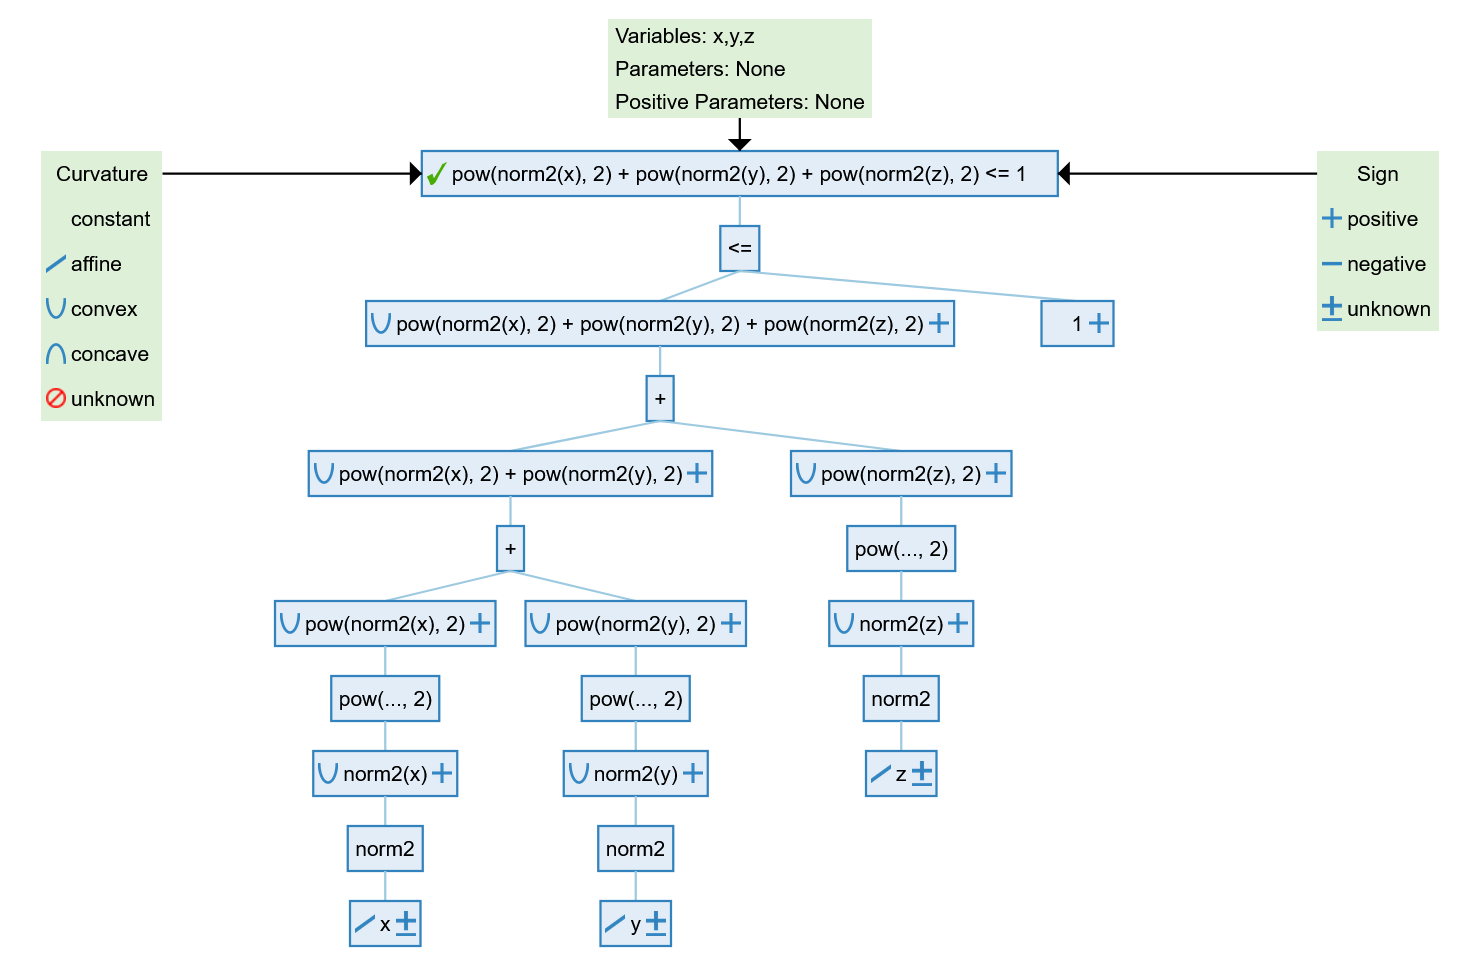

#### b) $\sqrt{x^2 + 1} \leq 3x + y$

<span style="color:green;">
<b>Answer:</b>

<kbd>pow(x, 2) + 1 <= 3 * x + y</kbd>

$
x^2 + 1 \leq 3x + y
$
</span>

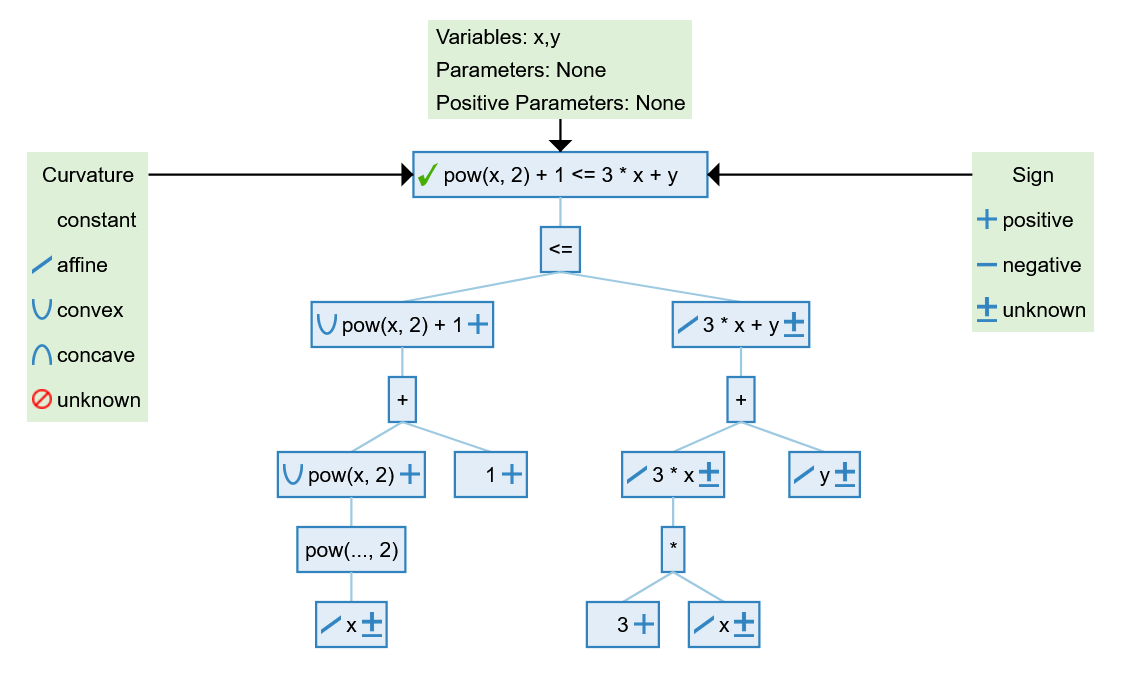

#### c) $\frac{1}{x} + \frac{2}{y} \leq 5 \quad x, y > 0$

<span style="color:green;">

<kbd>inv_pos(x) + 2 * inv_pos(y) <= 5</kbd>

$
\frac{1}{x} + \frac{2}{y} \leq 5 \quad x, y > 0
$
</span>

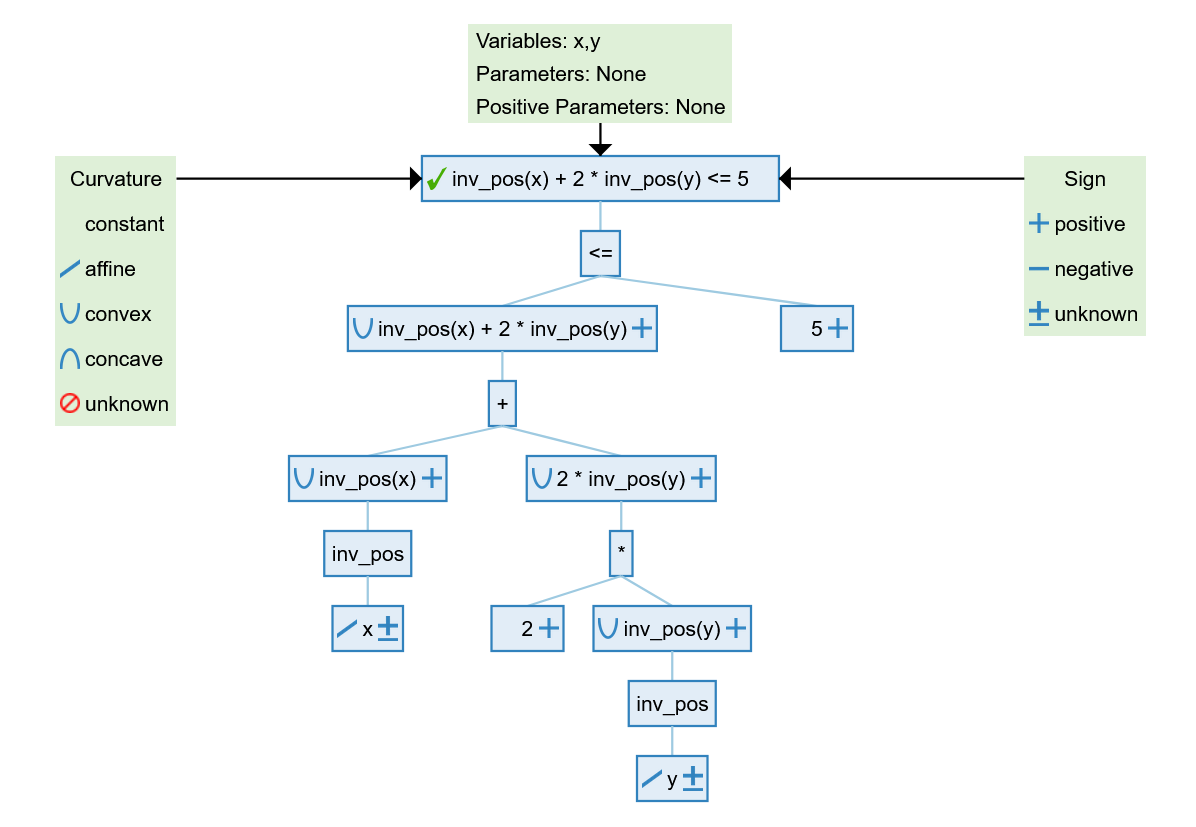

#### d) $(x + z) y \geq 1 \quad x + z, y \geq 0$

<span style="color:green;">

<kbd>y >= inv_pos(x + z)</kbd>

$
y \geq \frac{1}{x + z} \quad x + z \geq 0
$
</span>

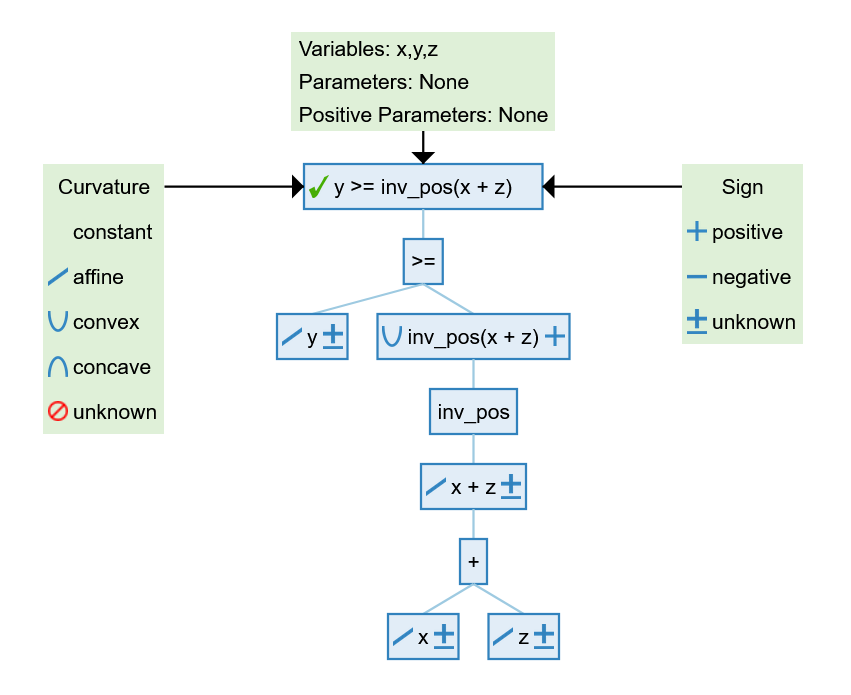

#### e) $x\sqrt{y} \geq 1 \quad x, y \geq 0$

<span style="color:green;">

<kbd>sqrt(y) >= inv_pos(x)</kbd>

$
\sqrt{y} \geq \frac{1}{x} \quad x \geq 0
$
</span>

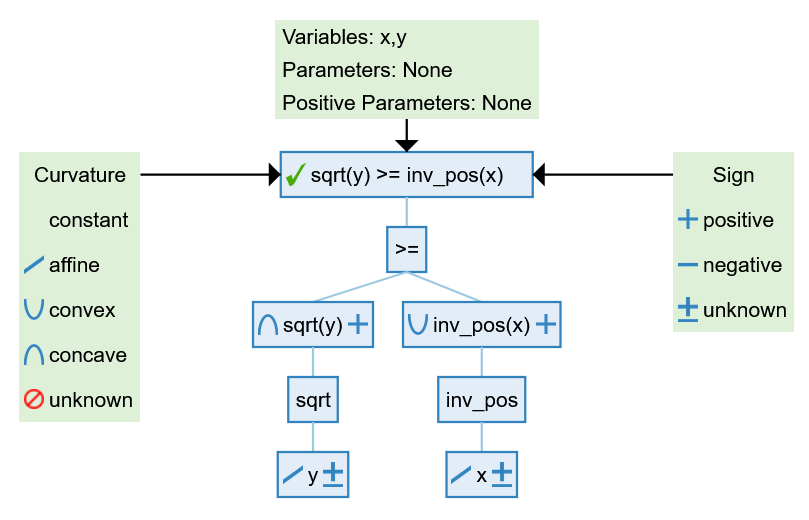

#### f) $log(e^{y-1} + e^{x/2}) \leq e^{-x}$

<span style="color:green;">

<kbd>exp(exp(x) + y - 1) + exp(exp(x) + x / 2) <= 1</kbd>

$
e^{e^x + y - 1} + e^{e^x + x / 2} \leq 1
$
</span>

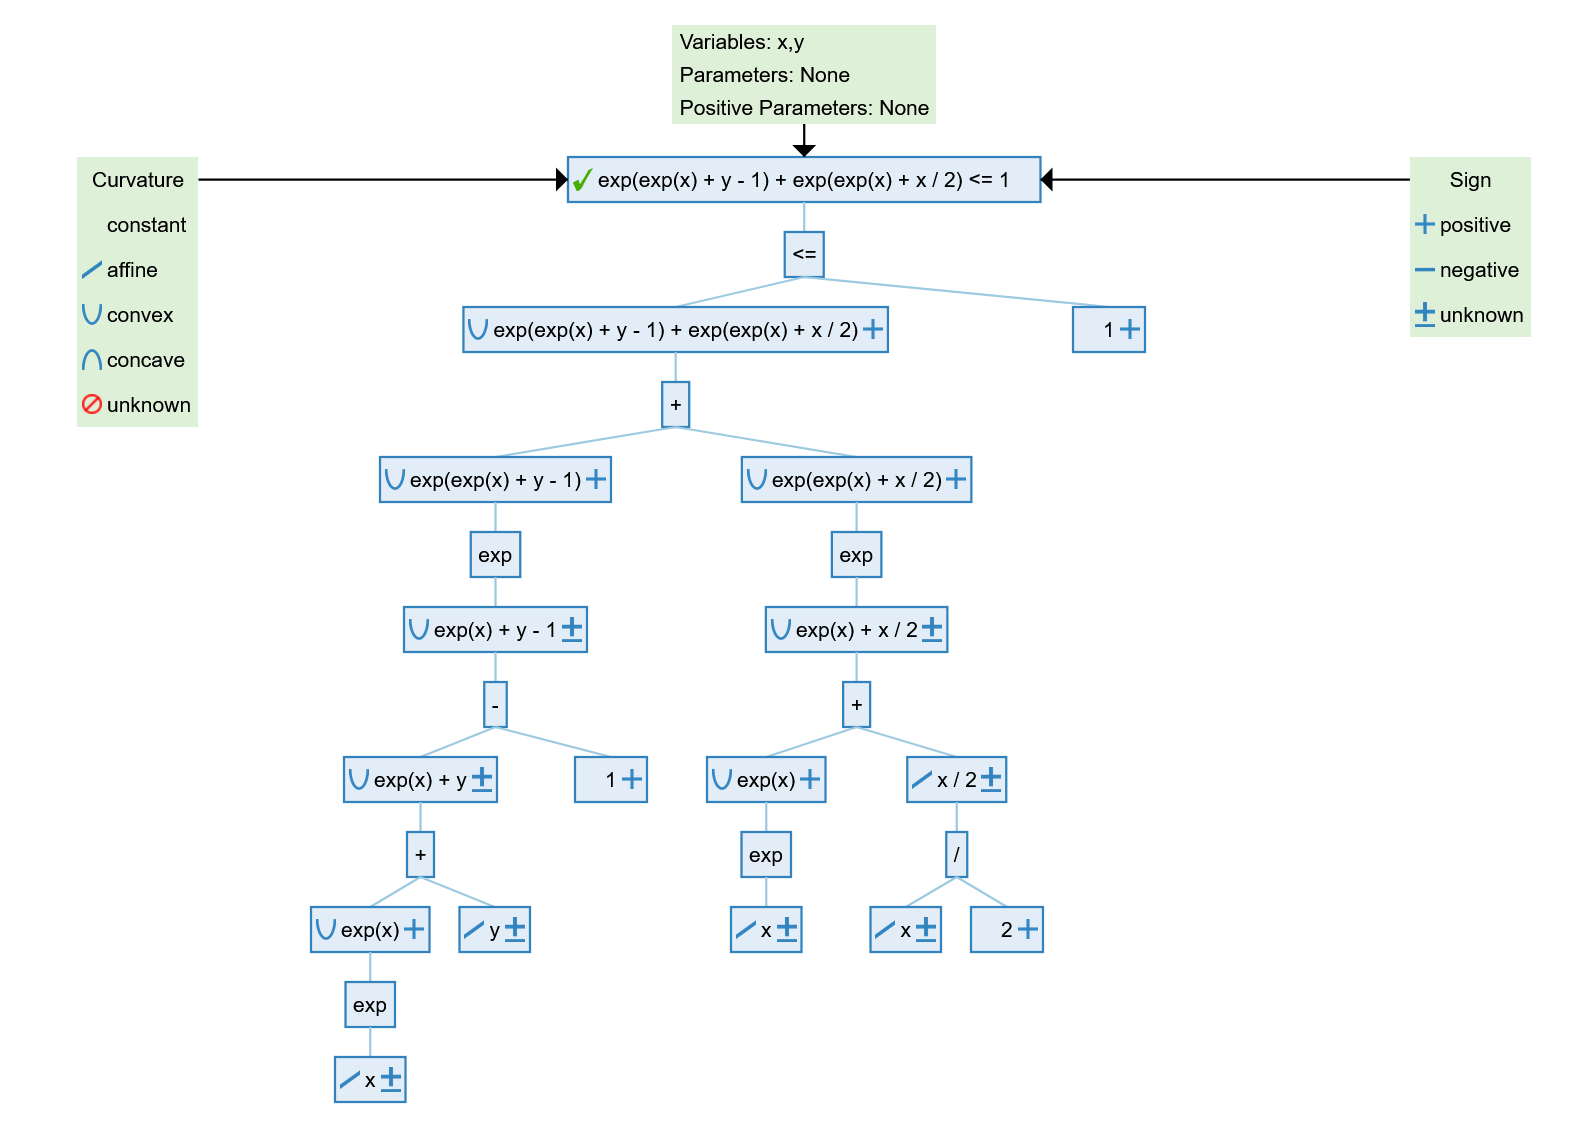

#### g) $\frac{y^2}{z} + z \leq 1$

<span style="color:green;">

<kbd>quad_over_lin(y, x) + z <= 1</kbd>

$
\frac{y^2}{z} + z \leq 1
$
</span>

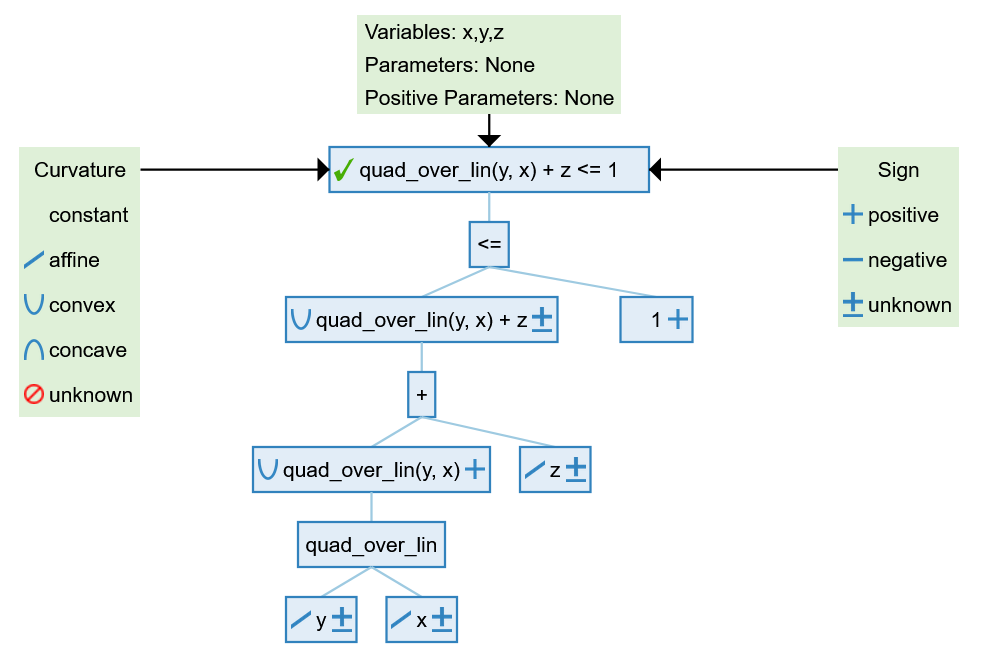

#### h) $xlog(\frac{x}{y}) \leq x - y \quad x, y > 0$

<span style="color:green;">

<kbd>kl_div(x, y) <= 0</kbd>

$
xlog(\frac{x}{y}) - x + y \leq 0
$
</span>

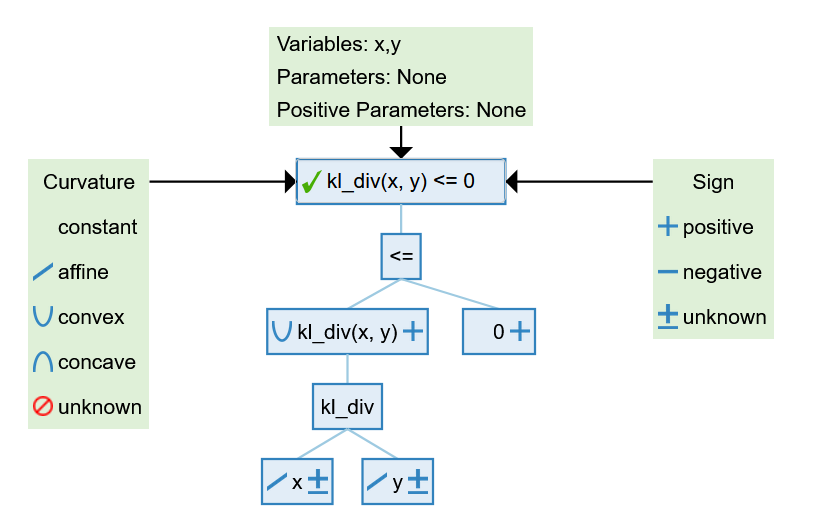

### **2)**


## 2) 2D Lasso Problem

### **1)**

In [77]:
data = pd.read_csv('toy.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [78]:
n, m = data.shape

y = data.to_numpy()

theta = cp.Variable(y.shape)
lambd = cp.Parameter(nonneg=True)

objective_fn = 0.5 * cp.norm(y - theta, 'fro')**2

h_diff = cp.diff(theta, axis=0)[:, :-1].flatten('F')
v_diff = cp.diff(theta, axis=1)[:-1, :].flatten('F')

regularizer = lambd * (cp.norm1(h_diff) + cp.norm1(v_diff))

objective = cp.Minimize(objective_fn + regularizer)

problem = cp.Problem(objective)

lambd.value = 1

problem.solve()

print(f'DCP check: {problem.is_dcp()}')
print(f'Optimal value: {problem.value}')

DCP check: True
Optimal value: 199.15343024828536


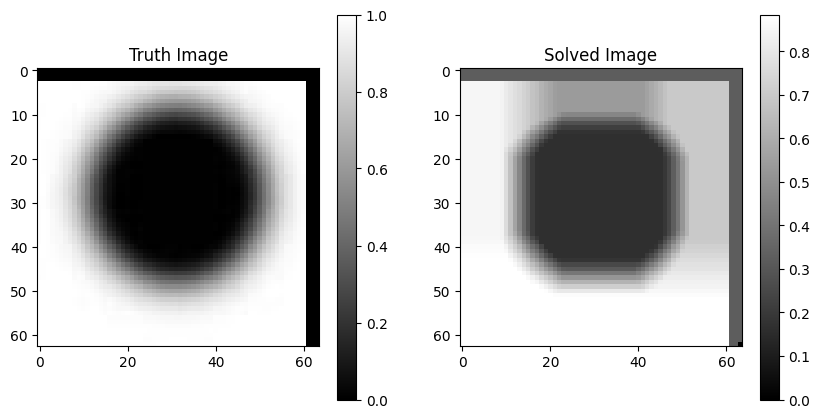

In [79]:
y_image = y.reshape((n, m))

theta_image = theta.value.reshape((n, m))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_image, cmap='gray')
plt.title("Truth Image")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(theta_image, cmap='gray')
plt.title("Solved Image")
plt.colorbar()

plt.show()

### **2)**

In [80]:
n, m = data.shape

y = data.to_numpy()

theta = cp.Variable(y.shape)
lambd = cp.Parameter(nonneg=True)

objective_fn = 0.5 * cp.norm(y - theta, 'fro')**2

h_diff = cp.diff(theta, axis=0)[:, :-1].flatten('F')
v_diff = cp.diff(theta, axis=1)[:-1, :].flatten('F')

thet = cp.vstack([h_diff, v_diff])

norm = cp.norm(thet, p=2, axis=0)

regularizer = lambd * cp.sum(norm)

objective = cp.Minimize(objective_fn + regularizer)

problem = cp.Problem(objective)

lambd.value = 1

problem.solve()

print(f'DCP check: {problem.is_dcp()}')
print(f'Optimal value: {problem.value}')

DCP check: True
Optimal value: 181.56929284044637


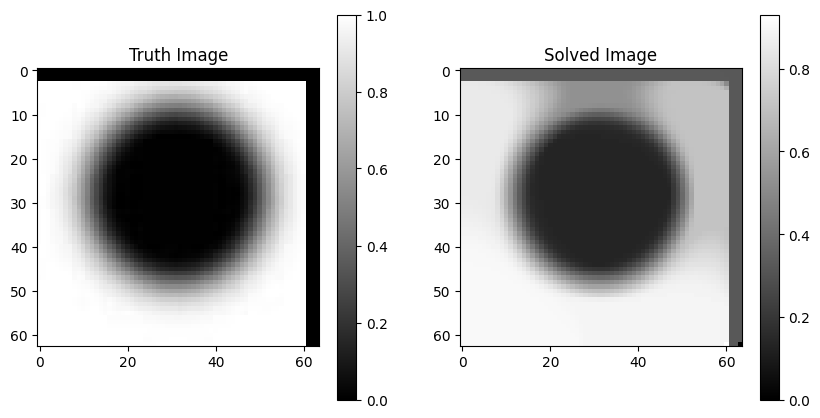

In [81]:
y_image = y

theta_image = theta.value

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_image, cmap='gray')
plt.title("Truth Image")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(theta_image, cmap='gray')
plt.title("Solved Image")
plt.colorbar()

plt.show()

### **3)**

In [82]:
image = pd.read_csv('baboon.csv', header=None).to_numpy()
image.shape
y = image

In [83]:
def plot_images(y_image, theta_images, name, lambdas, objectives, max_col=3):
    num_plots = len(theta_images) + 1

    row, col = max(1, int(np.ceil(num_plots / max_col))), min(max_col, num_plots)
    fig, axes = plt.subplots(row, col, figsize=(4 * col, 4 * row), sharey=True)

    axes[0, 0].imshow(y_image, cmap='gray')

    axes[0, 0].set_title('Truth Image')

    for i in range(1, num_plots):
        r = int(i / col)
        c = i % col

        axes[r, c].imshow(theta_images[i-1], cmap='gray')

        axes[r, c].set_title(f'{name} labmda: {lambdas[i-1]}, objective: {np.round(objectives[i-1], 3)}')

    plt.tight_layout()
    plt.show()

In [84]:
def plot_hist(lambdas, pixels, bins=100, max_col=3):
    num_plots = len(lambdas)

    row, col = max(1, int(np.ceil(num_plots / max_col))), min(max_col, num_plots)
    fig, axes = plt.subplots(row, col, figsize=(4 * col, 4 * row), sharey=True)

    for i in range(num_plots):
        r = int(i / col)
        c = i % col
        
        axes[r, c].hist(pixels[i].flatten('F'), bins=bins, edgecolor='black', alpha=0.7, color='skyblue')

        axes[r, c].set_title(f'pixels values (lambda: {lambdas[i]})')
        axes[r, c].set_xlabel('pixel values')
        axes[r, c].set_ylabel('frequency')
        axes[r, c].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

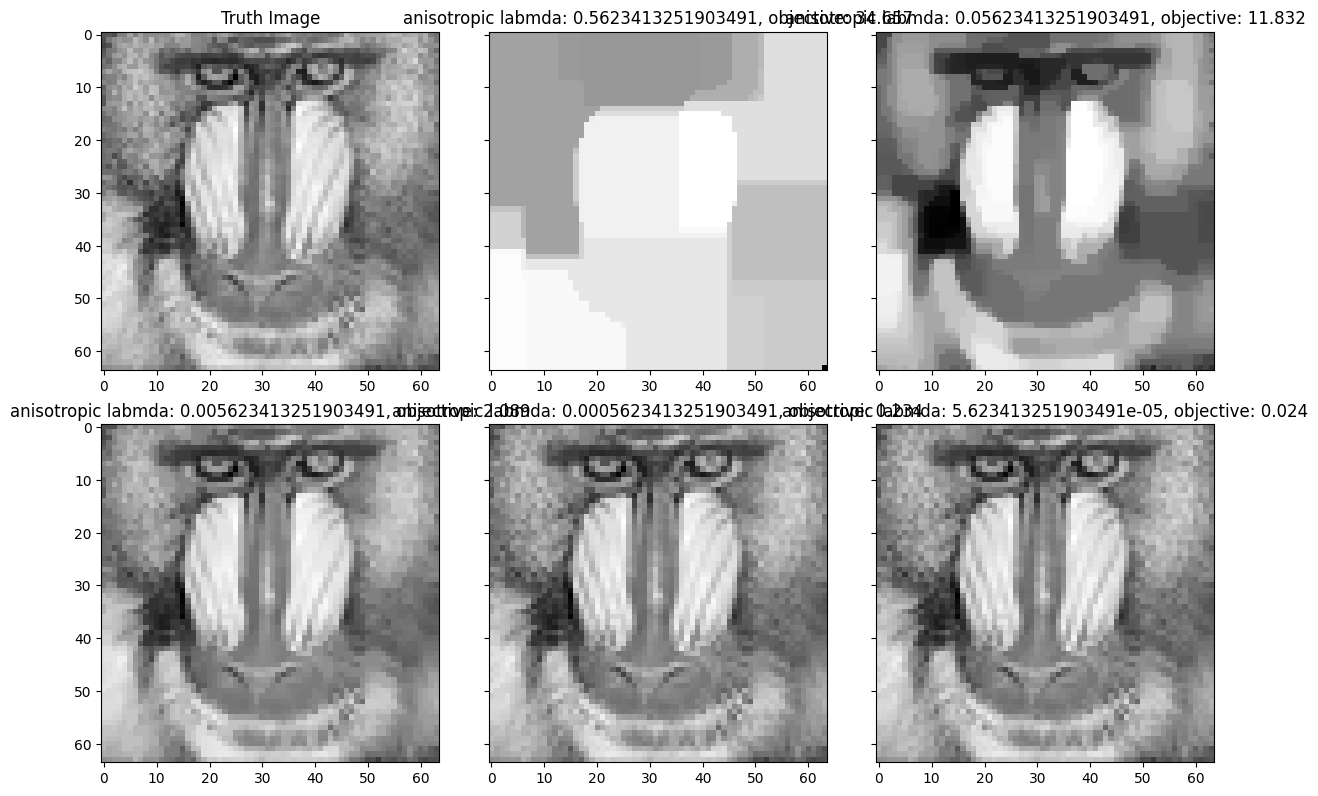

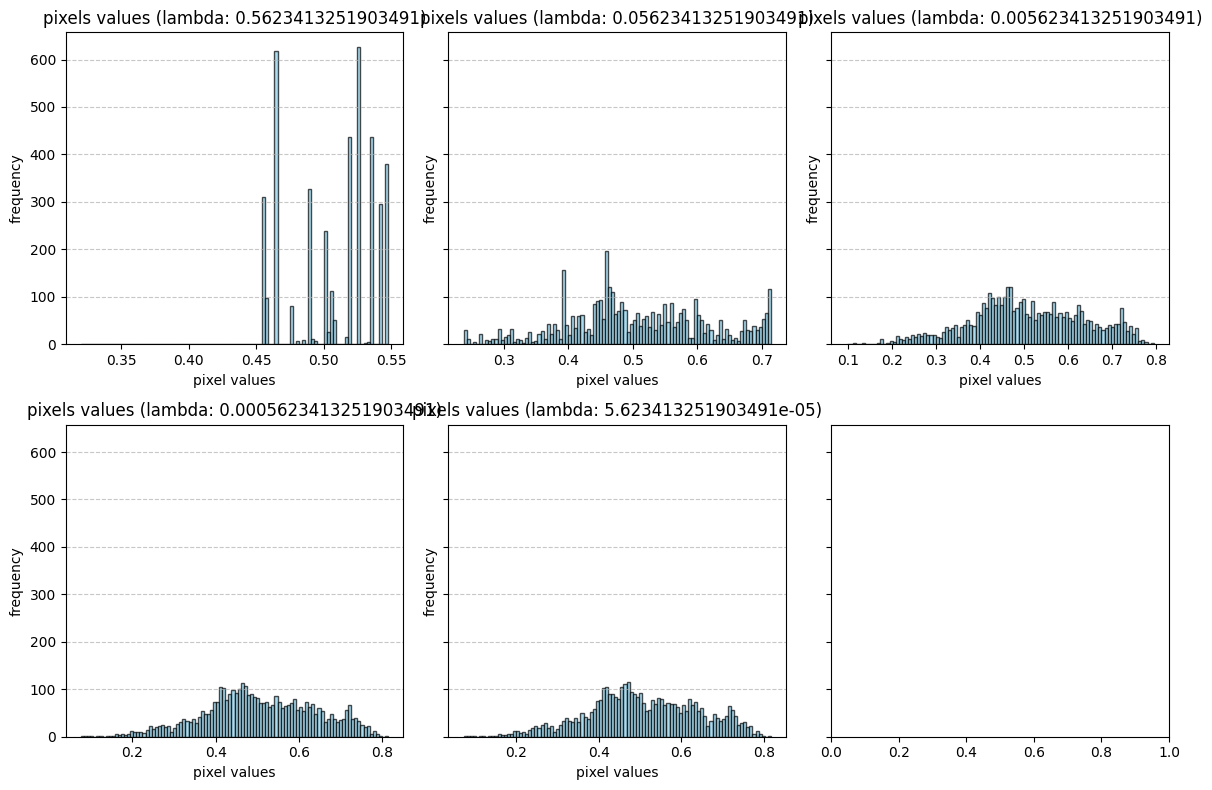

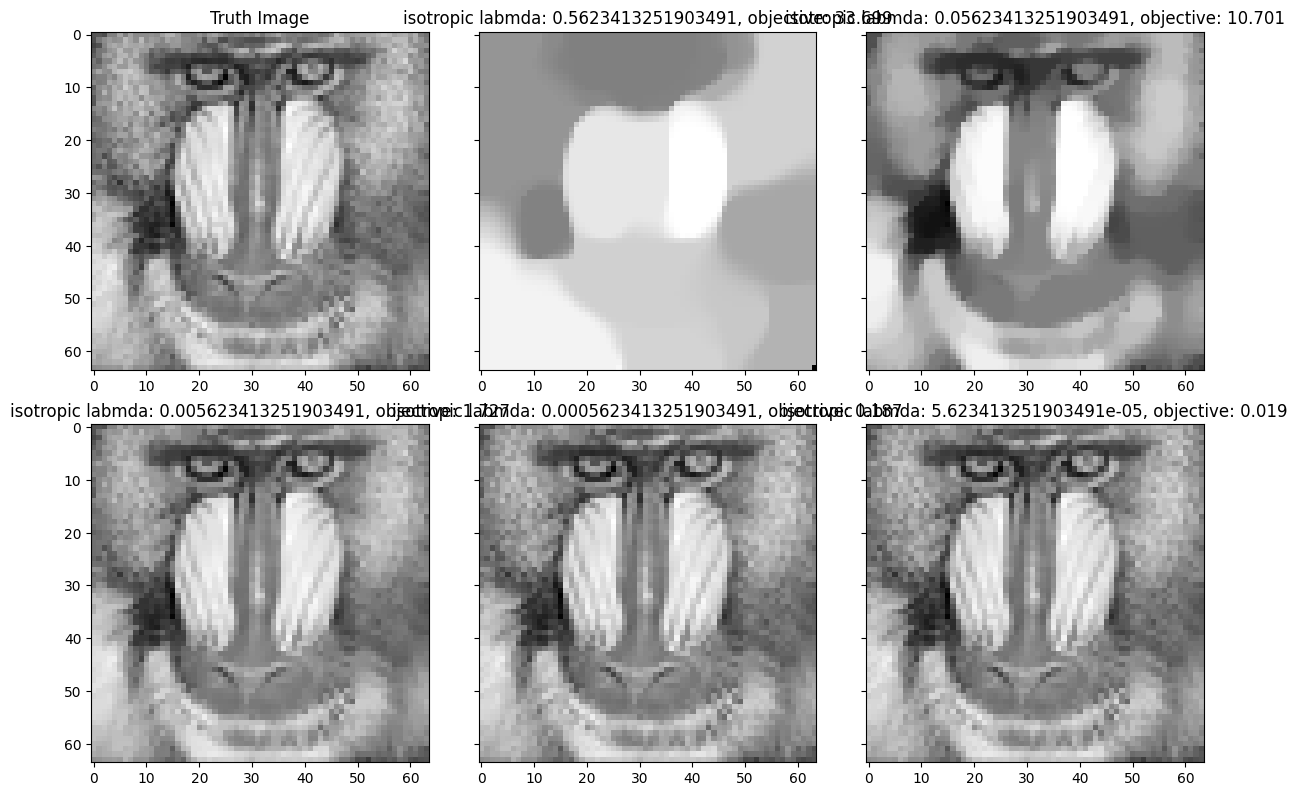

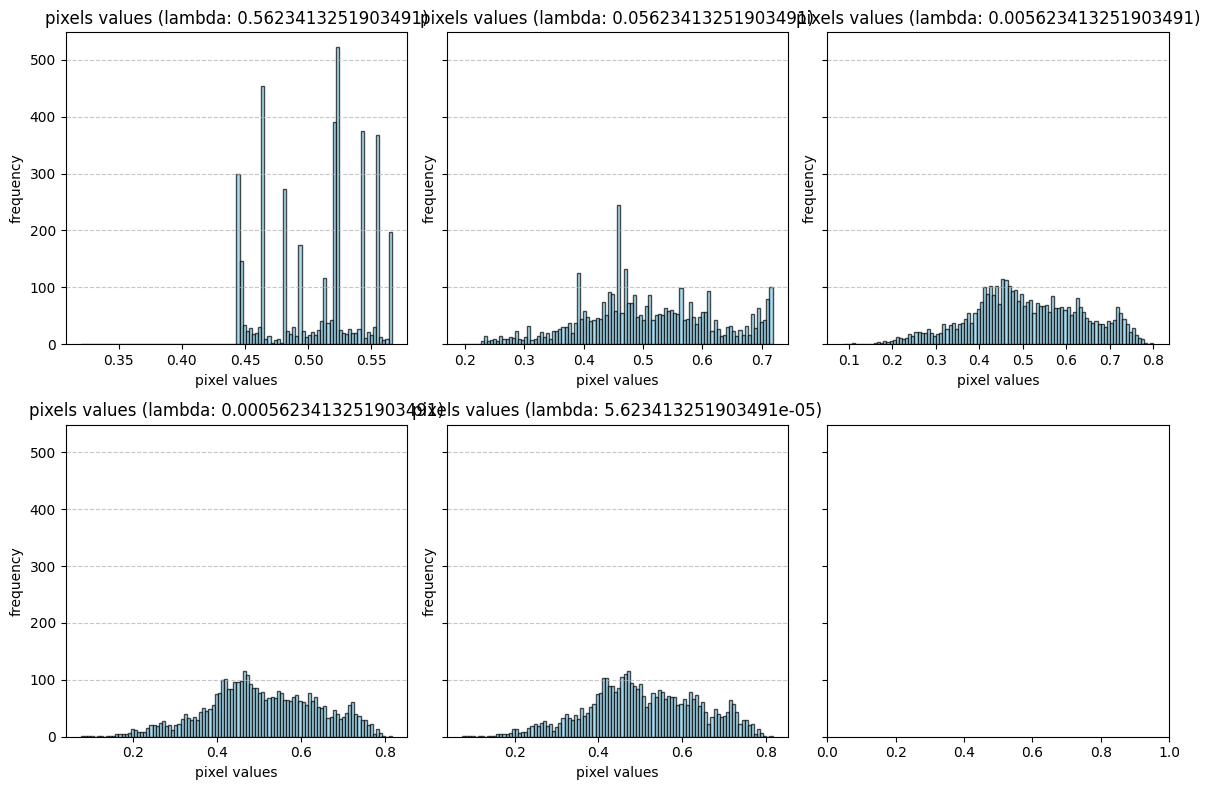

In [85]:
lambdas = [10**(-0.25-i) for i in range(5)]

theta = cp.Variable(y.shape)
lambd = cp.Parameter(nonneg=True)

objective_fn = 0.5 * cp.norm(y - theta, 'fro')**2

h_diff = cp.diff(theta, axis=0)[:, :-1].flatten('F')
v_diff = cp.diff(theta, axis=1)[:-1, :].flatten('F')

thet = cp.vstack([h_diff, v_diff])

thet = cp.vstack([h_diff, v_diff])

norm1 = cp.norm(thet, p=1, axis=0)
norm2 = cp.norm(thet, p=2, axis=0)

regularizer1 = lambd * cp.sum(norm1)
regularizer2 = lambd * cp.sum(norm2)

objective1 = cp.Minimize(objective_fn + regularizer1)
objective2 = cp.Minimize(objective_fn + regularizer2)

problem1 = cp.Problem(objective1)
problem2 = cp.Problem(objective2)

objective_values1 = []
theta_values1 = []

objective_values2 = []
theta_values2 = []

y_image = image

for l in lambdas:
    lambd.value = l
    
    problem1.solve()
    objective_values1.append(problem1.value)
    theta_values1.append(theta.value)

    problem2.solve()
    objective_values2.append(problem2.value)
    theta_values2.append(theta.value)

plot_images(y_image, theta_values1, name='anisotropic', lambdas=lambdas, objectives=objective_values1)
plot_hist(lambdas, theta_values1)


plot_images(y_image, theta_values2, name='isotropic', lambdas=lambdas, objectives=objective_values2)
plot_hist(lambdas, theta_values2)

## 3) Group Testing

In [86]:
def generate_test(N=1000, S=10, M=100, K=10):
    """
    # Construct the problem
    N = 1000 # Population size
    S = 10 # Number of infected individuals
    M = 100 # Number of tests
    K = 10 # Number of splits of each sample
    """

    # Define x0
    ind0 = np.random.choice(N,S,0) # index subset 
    x0 = np.zeros(N) 
    x0[ind0] = np.random.rand(S)

    # Define A
    A = np.zeros((M,N))
    for i in np.arange(N):
        ind = np.random.choice(M,K,replace=False)
        A[ind,i] = 1

    y = A @ x0

    return y, A, x0

In [87]:
N=1000
S=10
M=100
K=10

### **a)**

In [88]:
def estimate_test(N=1000, S=10, M=100, K=10):
    y, A, x0 = generate_test(N=N, S=S, M=M, K=K)

    x = cp.Variable(N)

    objective = cp.Minimize(cp.norm1(x))

    constraints = [
        x >= 0,
        A @ x == y
    ]

    problem = cp.Problem(objective, constraints)

    problem.solve()

    return x.value, x0

In [89]:
x, x0 = estimate_test()

if np.linalg.norm(x - x0) < 1e-6:
    print(f'solver result and x0 are the same ||x - x0|| = {np.linalg.norm(x - x0)}')
else:
    print(f'solver result and x0 are not the same |x - x0|| = {np.linalg.norm(x - x0)}')

solver result and x0 are the same ||x - x0|| = 8.267562819660164e-10


### **b)**

In [90]:
def find_lowestK(treshold=1e-6):
    for k in range(K, 0, -1):
        x, x0 = estimate_test(K=k)
        if np.linalg.norm(x - x0) > treshold:
            return k+1
    return None

In [91]:
treshold=1e-6

lowest_k = find_lowestK()

print(f'lowerst K such that ||x - x0|| < {treshold} is {lowest_k}')

lowerst K such that ||x - x0|| < 1e-06 is 4


### **c)**

In [92]:
def find_largestS(s=S, k=K, treshold=1e-6, max_iter=1000):
    for _ in range(max_iter):
        x, x0 = estimate_test(S=s, K=k)
        if np.linalg.norm(x - x0) > treshold:
            return s-1
        s += 1
    return None

In [93]:
largest_s = find_largestS()

print(f'largest S such that ||x - x0|| < {treshold} is {largest_s}')

largest S such that ||x - x0|| < 1e-06 is 25


In [94]:
def find_bestK(K_list):
    errors = []
    for k in K_list:
        best_S = find_largestS(k=k)
        x, x0 = estimate_test(S=best_S, K=k)
        errors.append(np.linalg.norm(x - x0))

    best_k_index = np.argmin(errors)

    return K_list[best_k_index], errors[best_k_index]

In [95]:
K_list = [i for i in range(10, 25)]

best_k, best_k_error = find_bestK(K_list)

print(f'best K is {best_k} with ||x - x0||={np.round(best_k_error, 4)}')

c:\Users\Password Please\AppData\Local\Programs\Python\Python312\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


best K is 21 with ||x - x0||=0.0


## 4) Group Testing

### **a)**

### **b)**

In [96]:
data = np.load('LQM_data.npz')
data.files

['X_train', 'Y_train', 'd_train', 'X_test', 'Y_test', 'd_test']

In [97]:
X_train, Y_train, d_train, X_test, Y_test, d_test = data['X_train'].T, data['Y_train'].T, data['d_train'], data['X_test'].T, data['Y_test'].T, data['d_test']

In [98]:
n, m = X_train.shape

P = cp.Variable((m, m), PSD=True)

d = d_train

diff = X_train - Y_train

dp = []

for i in range(n):
    quadratic = cp.quad_form(diff[i], P)
    dp.append(quadratic)

dp = cp.vstack(dp)

objective = cp.Minimize(cp.mean(d**2 + dp - 2 * cp.multiply(d, cp.sqrt(dp))))

problem = cp.Problem(objective)

problem.solve()

print(f'DCP check: {problem.is_dcp()}')
print(f'Optimal value: {problem.value}')
print(f'Optimal P: {P.value}')

DCP check: True
Optimal value: 18.732750457316452
Optimal P: [[ 2.26584966 -1.94732265  1.15648621 -3.26045096  1.35030935]
 [-1.94732265 10.01279533 -2.67095334 -0.82394294  1.52337085]
 [ 1.15648621 -2.67095334  6.56570247 -0.02579255 -1.99784236]
 [-3.26045096 -0.82394294 -0.02579255  6.46369846 -3.17688225]
 [ 1.35030935  1.52337085 -1.99784236 -3.17688225  4.08775786]]


## 5) Fitting a sphere to data

### **a)**

<span style="color:pink;">

$\begin{aligned}
\left\| u_i - x_c \right\|^2_2 - r^2 &= \left\| u_i \right\|^2_2 + \left\| x_c \right\|^2_2 - 2 u^T_i x_c - r^2 \\
&= (\left\| u_i \right\|^2_2) + (- 2 u^T_i x_c + (\left\| x_c \right\|^2_2 - r^2)) \\
&= b_i + (Az)_i \quad b_i = \left\| u_i \right\|^2_2 \quad A_i = [- 2 x_c  1] \quad z_i = \left\| x_c \right\|^2_2 - r^2
\end{aligned}$

$
Minimize \quad \left\| Az + b \right\|^2_2 \quad \equiv \quad Minimize \quad \sum^{m}_{i=1} (\left\| u_i - x_c \right\|^2_2 - r^2)^2
$


</span>

### **b)**

In [99]:
data = np.load('Q5.npz')
data.files

['U']

In [100]:
U = data['U'].T

In [112]:
n, m = U.shape

x_c = cp.Variable(m)
s = cp.Variable()

u = cp.Parameter((n, m))

A = cp.hstack([-2 * u, np.ones((n, 1))])

z = cp.hstack([x_c, s])

b = cp.norm(u, p=2, axis=1)**2

objective = cp.Minimize(cp.norm2(A @ z + b)**2)

problem = cp.Problem(objective)

u.value = U

problem.solve()

print(f'DCP check: {problem.is_dcp()}')
print(f'Optimal value: {problem.value}')
print(f'Optimal center: {x_c.value}')
print(f'Optimal radius: {np.sqrt(- s.value + np.linalg.norm(x_c.value, 2)**2)}')

DCP check: True
Optimal value: 0.5565072224761292
Optimal center: [-2.58690471  6.48834954]
Optimal radius: 1.3052264790579757


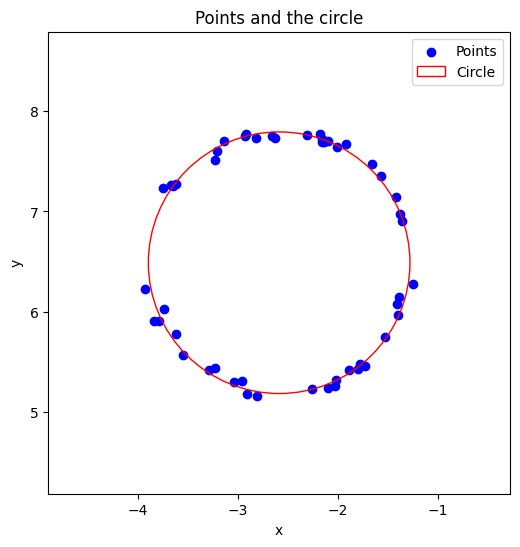

In [113]:
plt.figure(figsize=(6, 6))

plt.scatter(U[:, 0], U[:, 1], color='blue')
plt.gca().set_aspect('equal', adjustable='box')

radius = np.sqrt(- s.value + np.linalg.norm(x_c.value, 2)**2)

circle = plt.Circle((x_c.value[0], x_c.value[1]), radius, color='red', fill=False)

plt.gca().add_artist(circle)

plt.xlim(x_c.value[0] - radius - 1, x_c.value[0] + radius + 1)
plt.ylim(x_c.value[1] - radius - 1, x_c.value[1] + radius + 1)


plt.xlabel('x')
plt.ylabel('y')

plt.title('Points and the circle')

plt.legend(['Points', 'Circle'])

plt.show()

## 6) Minimax Rational Fit to the Exponential

In [ ]:
k = 201
t = np.linspace(-3, 3, k)
y = np.exp(t)

a0 = cp.Variable()
a1 = cp.Variable()
a2 = cp.Variable()
b1 = cp.Variable()
b2 = cp.Variable()

m = cp.Variable()

f = (a0 + a1 * t + a2 * t**2)

c = 1 + b1 * t + b2 * t**2

y_ = cp.multiply(y, c)

m_ = cp.multiply(m, c)

objective = cp.Minimize(m)

constraints = [
    c >= 0,
    f - y_ <= m,
    y_ - f <= m
]

problem = cp.Problem(objective, constraints)

problem.solve()

print(f'DCP check: {problem.is_dcp()}')
print(f'Optimal value: {problem.value}')
print(f'Optimal a0: {a0.value}')
print(f'Optimal a1: {a1.value}')
print(f'Optimal a2: {a2.value}')
print(f'Optimal b1: {b1.value}')
print(f'Optimal b2: {b2.value}')

DCP check: True
Optimal value: 0.01802263168210907
Optimal a0: 1.0178974607347966
Optimal a1: 0.5525436721163607
Optimal a2: 0.08878182371307741
Optimal b1: -0.44396725089048367
Optimal b2: 0.05619860515761475
